In [26]:
import sys
sys.path.append('../')

import utils
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
import numpy as np

plt.style.use('../style.mpl')

In [2]:
G = utils.load_network(path="../data/network.pkl")
print(G)

Graph with 1139 nodes and 17908 edges


In [55]:
nx.degree_pearson_correlation_coefficient(G)

0.12542466778442452

In [58]:
def common_neighbors(G, u, v):
    return len(list(nx.common_neighbors(G, u, v)))

common_neighbors_dict = {}
cosine_similarity_dict = {}
jaccard_similarity_dict = {}
pearson_correlation_dict = {}

nodes = list(G.nodes())
node_index = {node: i for i, node in enumerate(nodes)}

A = nx.to_numpy_array(G, nodelist=nodes)

for u in G.nodes():
    for v in G.nodes():
        if u != v:
            neighbors_u = set(G.neighbors(u))
            neighbors_v = set(G.neighbors(v))
            intersection_size = len(neighbors_u & neighbors_v)
            union_size = len(neighbors_u | neighbors_v)

            common_neighbors_dict[(u, v)] = intersection_size

            jaccard_similarity = intersection_size / union_size if union_size != 0 else 0.0
            jaccard_similarity_dict[(u, v)] = jaccard_similarity

            cosine_denominator = np.sqrt(len(neighbors_u) * len(neighbors_v))
            cosine_similarity = intersection_size / cosine_denominator if cosine_denominator != 0 else 0.0
            cosine_similarity_dict[(u, v)] = cosine_similarity

            vec_u = A[node_index[u]]
            vec_v = A[node_index[v]]
            if np.std(vec_u) == 0 or np.std(vec_v) == 0:
                pearson_corr = 0.0 
            else:
                pearson_corr = np.corrcoef(vec_u, vec_v)[0, 1]
            pearson_correlation_dict[(u, v)] = pearson_corr


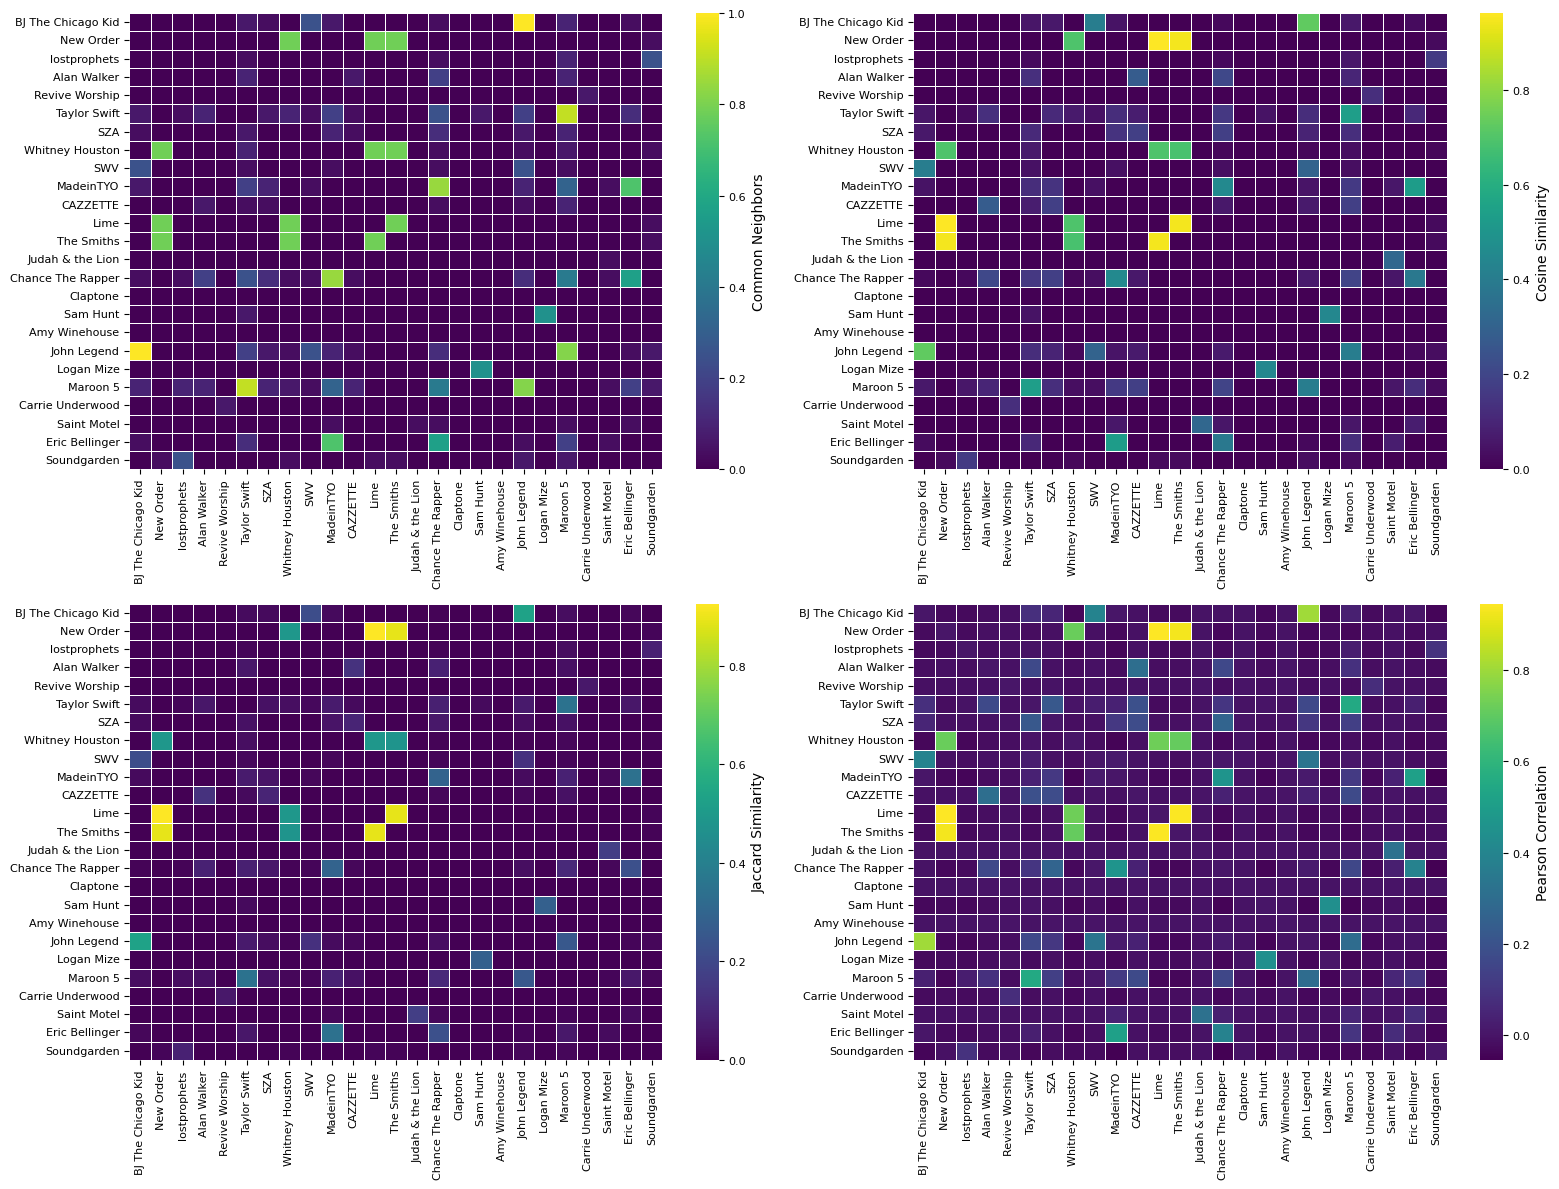

In [70]:
f, axes = plt.subplots(2,2, figsize=(16, 12))

# Get 20 random nodes
np.random.seed(44)
random_nodes = np.random.choice(G.nodes(), 25, replace=False)

common_neighbors_matrix = pd.DataFrame(index=random_nodes, columns=random_nodes)
cosine_similarity_matrix = pd.DataFrame(index=random_nodes, columns=random_nodes)
jaccard_similarity_matrix = pd.DataFrame(index=random_nodes, columns=random_nodes)
pearson_correlation_matrix = pd.DataFrame(index=random_nodes, columns=random_nodes)
for u in random_nodes:
    for v in random_nodes:
        if u != v:
            common_neighbors_matrix.loc[u, v] = common_neighbors_dict[(u, v)]
            cosine_similarity_matrix.loc[u, v] = cosine_similarity_dict[(u, v)]
            jaccard_similarity_matrix.loc[u, v] = jaccard_similarity_dict[(u, v)]
            pearson_correlation_matrix.loc[u, v] = pearson_correlation_dict[(u, v)]

cosine_similarity_matrix = cosine_similarity_matrix.astype(float).fillna(0)
jaccard_similarity_matrix = jaccard_similarity_matrix.astype(float).fillna(0)
common_neighbors_matrix = common_neighbors_matrix.astype(float).fillna(0)
pearson_correlation_matrix = pearson_correlation_matrix.astype(float).fillna(0)

# normalize common_neighbors_matrix to [0, 1]
common_neighbors_matrix = (common_neighbors_matrix - common_neighbors_matrix.min().min()) / (common_neighbors_matrix.max().max() - common_neighbors_matrix.min().min())

sns.heatmap(
    common_neighbors_matrix,
    cmap='viridis',
    cbar=True,
    cbar_kws={'label': 'Common Neighbors'},
    annot=False,
    fmt='.1f',
    ax=axes[0][0],
    linewidth=.5
)

sns.heatmap(
    cosine_similarity_matrix,
    cmap='viridis',
    cbar=True,
    cbar_kws={'label': 'Cosine Similarity'},
    annot=False,
    fmt='.1f',
    ax=axes[0][1],
    linewidth=.5
)

sns.heatmap(
    jaccard_similarity_matrix,
    cmap='viridis',
    cbar=True,
    cbar_kws={'label': 'Jaccard Similarity'},
    annot=False,
    fmt='.1f',
    ax=axes[1][0],
    linewidth=.5
)

sns.heatmap(
    pearson_correlation_matrix,
    cmap='viridis',
    cbar=True,
    cbar_kws={'label': 'Pearson Correlation'},
    annot=False,
    fmt='.1f',
    ax=axes[1][1],
    linewidth=.5
)

plt.tight_layout()
plt.savefig('../plots/equivalence.png', transparent=True)
plt.show()

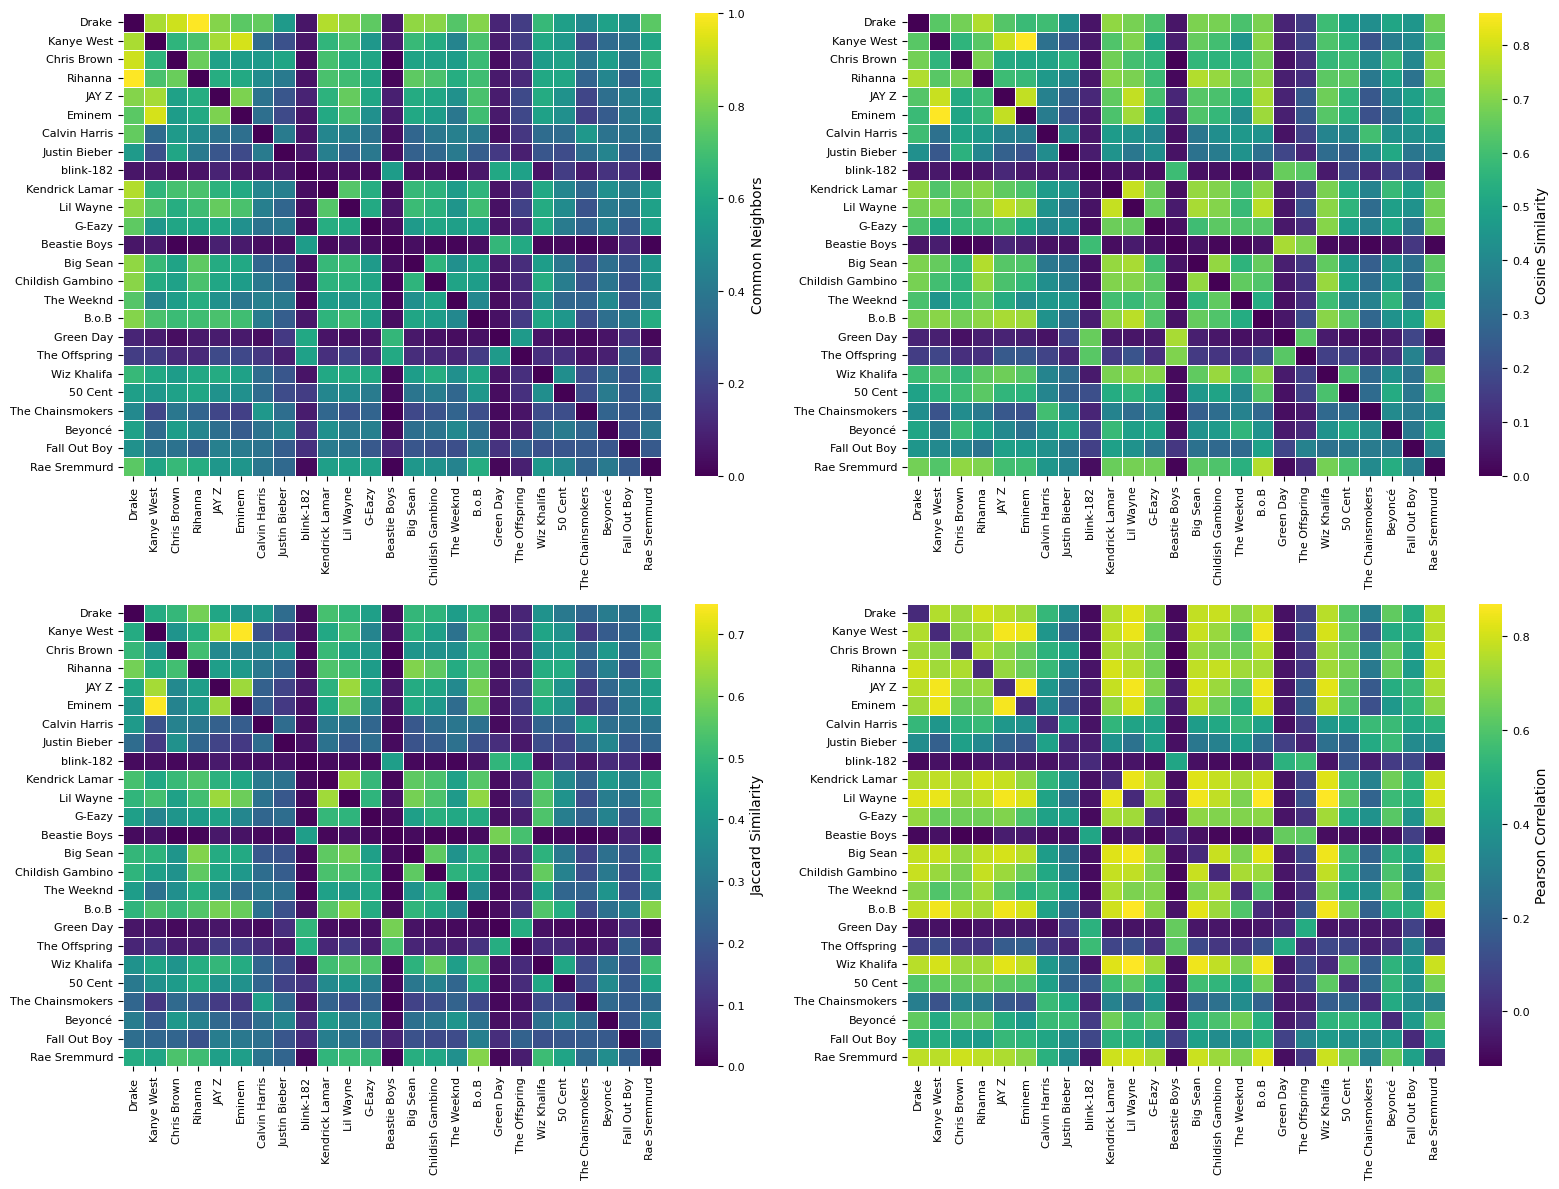

In [69]:
f, axes = plt.subplots(2,2, figsize=(16, 12))

# Get top 25 nodes by degree
degree_dict = dict(G.degree())
degree_dict = {k: v for k, v in sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)}
top_25_nodes = list(degree_dict.keys())[:25]

common_neighbors_matrix = pd.DataFrame(index=top_25_nodes, columns=top_25_nodes)
cosine_similarity_matrix = pd.DataFrame(index=top_25_nodes, columns=top_25_nodes)
jaccard_similarity_matrix = pd.DataFrame(index=top_25_nodes, columns=top_25_nodes)
pearson_correlation_matrix = pd.DataFrame(index=top_25_nodes, columns=top_25_nodes)
for u in top_25_nodes:
    for v in top_25_nodes:
        if u != v:
            common_neighbors_matrix.loc[u, v] = common_neighbors_dict[(u, v)]
            cosine_similarity_matrix.loc[u, v] = cosine_similarity_dict[(u, v)]
            jaccard_similarity_matrix.loc[u, v] = jaccard_similarity_dict[(u, v)]
            pearson_correlation_matrix.loc[u, v] = pearson_correlation_dict[(u, v)]

cosine_similarity_matrix = cosine_similarity_matrix.astype(float).fillna(0)
jaccard_similarity_matrix = jaccard_similarity_matrix.astype(float).fillna(0)
common_neighbors_matrix = common_neighbors_matrix.astype(float).fillna(0)
pearson_correlation_matrix = pearson_correlation_matrix.astype(float).fillna(0)

# normalize common_neighbors_matrix to [0, 1]
common_neighbors_matrix = (common_neighbors_matrix - common_neighbors_matrix.min().min()) / (common_neighbors_matrix.max().max() - common_neighbors_matrix.min().min())

sns.heatmap(
    common_neighbors_matrix,
    cmap='viridis',
    cbar=True,
    cbar_kws={'label': 'Common Neighbors'},
    annot=False,
    fmt='.1f',
    ax=axes[0][0],
    linewidth=.5
)

sns.heatmap(
    cosine_similarity_matrix,
    cmap='viridis',
    cbar=True,
    cbar_kws={'label': 'Cosine Similarity'},
    annot=False,
    fmt='.1f',
    ax=axes[0][1],
    linewidth=.5
)

sns.heatmap(
    jaccard_similarity_matrix,
    cmap='viridis',
    cbar=True,
    cbar_kws={'label': 'Jaccard Similarity'},
    annot=False,
    fmt='.1f',
    ax=axes[1][0],
    linewidth=.5
)

sns.heatmap(
    pearson_correlation_matrix,
    cmap='viridis',
    cbar=True,
    cbar_kws={'label': 'Pearson Correlation'},
    annot=False,
    fmt='.1f',
    ax=axes[1][1],
    linewidth=.5
)

plt.tight_layout()
plt.savefig('../plots/equivalence-top-25.png', transparent=True)
plt.show()

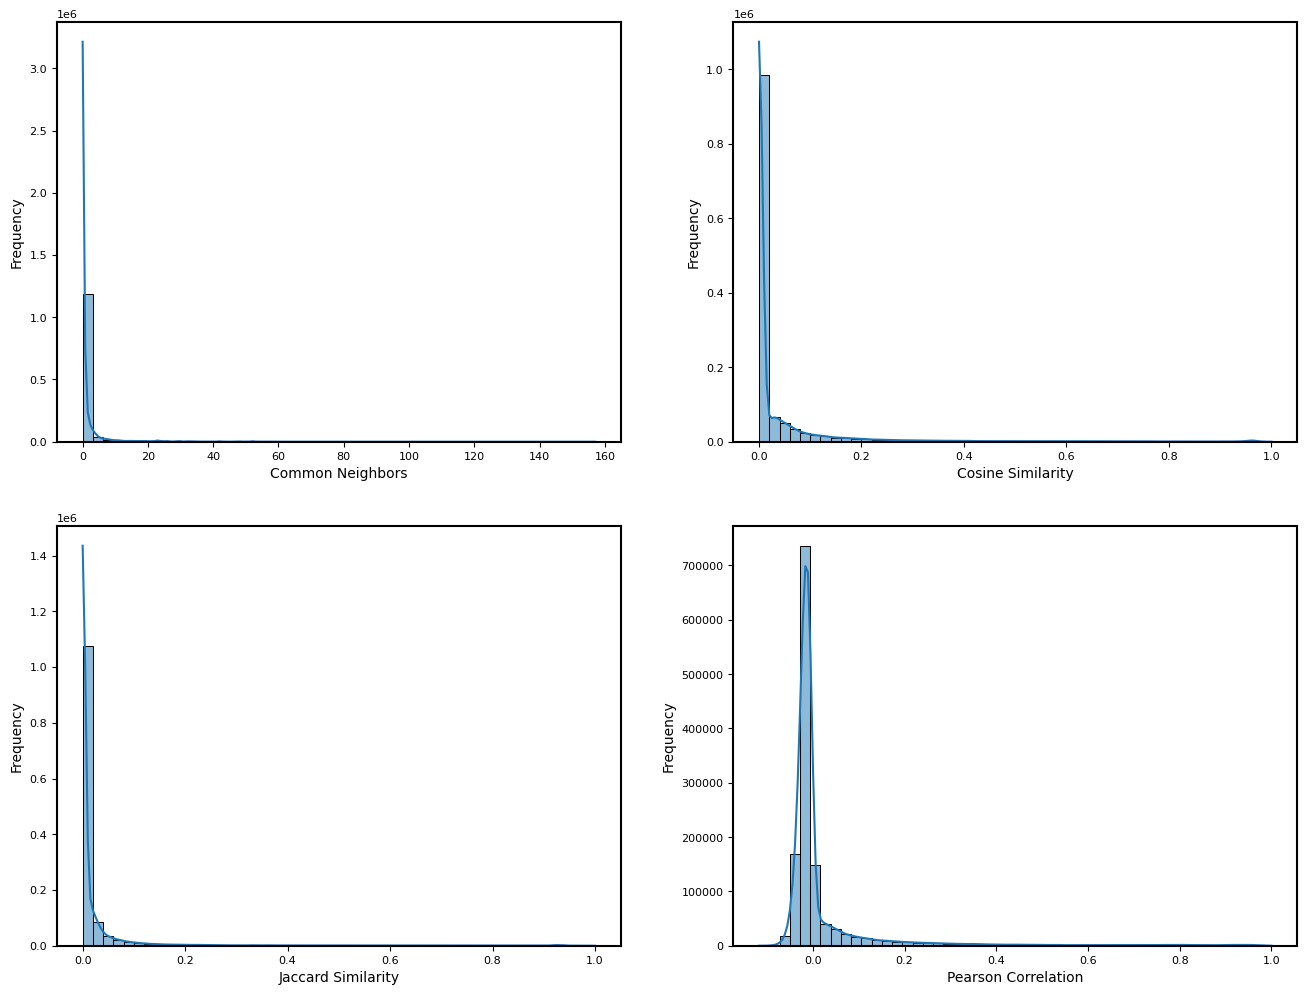

In [66]:
fig, axes = plt.subplots(2,2, figsize=(16, 12))

common_neighbors_values = list(common_neighbors_dict.values())
sns.histplot(common_neighbors_values, bins=50, kde=True, ax=axes[0][0])
axes[0][0].set_xlabel('Common Neighbors')
axes[0][0].set_ylabel('Frequency')

cosine_similarity_values = list(cosine_similarity_dict.values())
sns.histplot(cosine_similarity_values, bins=50, kde=True, ax=axes[0][1])
axes[0][1].set_xlabel('Cosine Similarity')
axes[0][1].set_ylabel('Frequency')

jaccard_similarity_values = list(jaccard_similarity_dict.values())
sns.histplot(jaccard_similarity_values, bins=50, kde=True, ax=axes[1][0])
axes[1][0].set_xlabel('Jaccard Similarity')
axes[1][0].set_ylabel('Frequency')

pearson_correlation_values = list(pearson_correlation_dict.values())
sns.histplot(pearson_correlation_values, bins=50, kde=True, ax=axes[1][1])
axes[1][1].set_xlabel('Pearson Correlation')
axes[1][1].set_ylabel('Frequency')

plt.show()